<a href="https://colab.research.google.com/github/kiranshahi/Natural-Language-Processing/blob/main/Natural_Language_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Langauage Processing

## Sentiment Analysis

### Problem description

Though the Sentiment analysis problem is considered as the basic problem in natural language processing, it is still a challenging problem if we want to achieve a perfect performance. Because of the wide variety of writing styles, sarcasm, slang, etc.

In this lab task, we are going to use the "movie_reviews" dataset from the nltk corpus. This dataset contains a set of 1000 positive and 1000 negative reviews.

We can formulate this problem of sentiment analysis for movie reviews in the following ways.

*   Load the positive and negative reviews separately into raw_data
*   We generate the labels for the reviews, 0 for positive and 1 for negative. From "raw_data" and "labels", we split 80% data into the training set and 20% in the testing set.
*   Convert the text into tf-idf / tf vectors.
*   Train the data with naïve Bayes classifier. Since our data are discrete, we will use Multinomial Naïve Bayes classifier to train dataset.
*   Next, we will evaluate the performance from the metrics of precision, recall and f1-score.

### Implementation and Results

In [ ]:
!pip install nltk
import nltk
from nltk.corpus import movie_reviews

nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [ ]:
# Get the positive and negative review IDs
fileids_pos = movie_reviews.fileids('pos')
fileids_neg = movie_reviews.fileids('neg')
# Load the reviews
raw_data = []
for i in range(len(fileids_pos)):
  raw_data.append(movie_reviews.raw(fileids_pos[i]))
for i in range(len(fileids_neg)):
  raw_data.append(movie_reviews.raw(fileids_neg[i]))

# The corresponding labels for the reviews, 0 for postive, 1 for negative
labels = [0] * len(fileids_pos) + [1] * len(fileids_neg)

# Split the training and testing set by 80-20%
X_train, X_test, Y_train, Y_test = train_test_split(raw_data, labels, test_size=0.2)

In [ ]:
# Calculate the tf-idf features from the training set
def calculate_tf_tfid(is_tfidf):
  tfidf = TfidfVectorizer(use_idf=is_tfidf)
  tfidf_data = tfidf.fit_transform(X_train)
  # print(tfidf_data.shape)
  
  # Train the naive Bayes model for prediction
  classifier = MultinomialNB().fit(tfidf_data, Y_train)

  test_performance(classifier, tfidf)


In [ ]:
# Evaluate the sentiment for each sentence in a review, and plot the variation of sentiment
def plot_sentiment_variation(classifier, tfidf):
  sentences = X_test[0].split('.')
  testing_tfidf = tfidf.transform(sentences)
  predictions = classifier.predict_proba(testing_tfidf)
  polarity = [x[0] - x[1] for x in predictions]
  # polarity = [x[0] if (x[0] > x[1]) else -x[1] for x in predictions]
  
  plt.xlabel('Sentences')
  plt.ylabel('Polarity')
  plt.plot(polarity)
  plt.ylim(-1, 1)

In [ ]:
# Performance on the testing set
def test_performance(classifier, tfidf):
  testing_tfidf = tfidf.transform(X_test)
  predictions = classifier.predict(testing_tfidf)
  print(metrics.classification_report(Y_test, predictions, target_names=['pos', 'neg']))
  plot_sentiment_variation(classifier,tfidf)

Performance evaluation metrics for tf-idf feature
              precision    recall  f1-score   support

         pos       0.93      0.54      0.68       216
         neg       0.64      0.95      0.76       184

    accuracy                           0.73       400
   macro avg       0.78      0.75      0.72       400
weighted avg       0.80      0.73      0.72       400



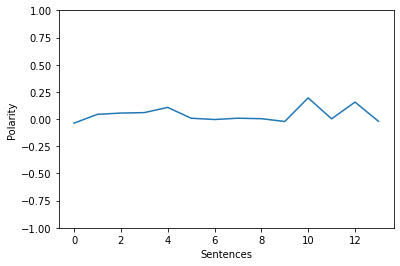

In [ ]:
#implementing the tf-idf feature
print("Performance evaluation metrics for tf-idf feature")
calculate_tf_tfid(True)

Performance evaluation metrics for tf feature
              precision    recall  f1-score   support

         pos       1.00      0.08      0.15       216
         neg       0.48      1.00      0.65       184

    accuracy                           0.50       400
   macro avg       0.74      0.54      0.40       400
weighted avg       0.76      0.50      0.38       400



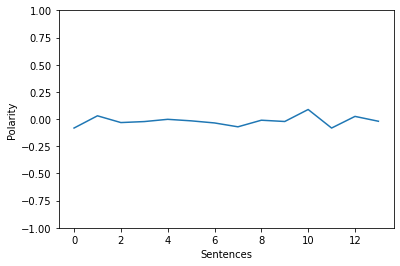

In [ ]:
#implementing the tf features
print("Performance evaluation metrics for tf feature")
calculate_tf_tfid(False)

In [ ]:
# print(X_train[0])
# print(testing_tfidf[0])

### Discussions
In this task, we had implemented sentiment analysis using the simple word count (tf/tf-idf) features and naïve Bayes method on "movie_reviews" dataset, where we have 1000 positive and 1000 negative reviews.

#### For tf feature
When using the tf feature we got an accuracy of 0.79 which means our model is 79% accurate. The result shows that the precision for positive is 0.89 (89%) and negative is 0.73 (73%). It means that 89 out of 100 reviews that were predicted positive are correct and others are false predictions. Similarly, 73 out of 100 negative reviews predicted were correct and the rest are false predictions. In comparison, to the tf-idf feature, the accuracy of negative prediction is quite low.

Likewise, the recall value for positive and negative prediction was 0.64 and 0.93 respectively. It means that model was able to predict 64 positive reviews out of 100 positive reviews. Similarly, it was able to predict 93 negative reviews out of 100 negative reviews which is pretty good.

#### For tf-idf feature
After using the tf-idf feature we got an accuracy of 0.83 which is higher than the tf feature. It means the sentiment analysis model using tf-idf feature is 83% accurate. From metrics for the performance evaluation displayed above, we got a precision of 0.84 for positive and 0.82 for negative. It means that 84% of the review predicted positive was correct and the rest were false prediction. Similarly, 82% of the review predicted negative was correct and the rest were false predictions.

Likewise, the recall value for positive was 0.80 and negative was 0.85. It means that model was able to predict 80 positive reviews out of 100 positive reviews and 85 negative reviews out of 100 negative reviews.

## Text Classification

### Problem description
In this task, we are going to categories the document and assign it to one of 20 newsgroups. Here we have dataset called 20newsgroups from sklearn which contain the collection of message and 20 newsgroups such as 'sci.electronics', 'sci.crypt','comp.os.ms-windows.misc', 'rec.motorcycles' etc.

We are going to use simple word count features like tf or tf-idf, and **Multinomial Naïve Bayes** as the method of classification.

We can formulate a text classification problem in the following steps.


*   20newsgroups dataset is divided into two subsets for training (development) and testing(performance evaluation). At first, we load the 'train' subset as training data.
*   We convert train data into tf-idf or tf vectors.
*   Next we train our data with Multinomial Naïve Bayes classifier.
*   We load the testing set of data, convert it into tf-idf features and perform the classification.


### Implementation and Results

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Get the training dataset for the specified categoires
categories = ['sci.electronics', 'sci.crypt',
              'comp.os.ms-windows.misc', 'rec.motorcycles']
training_data = fetch_20newsgroups(subset='train', categories=categories)



In [ ]:
# Create the tf-idf transformer
tfidf = TfidfVectorizer(use_idf=True)
# tfidf = TfidfVectorizer(use_idf=False)
training_tfidf = tfidf.fit_transform(training_data.data)
print(training_tfidf.shape)

# Train a Multinomial Naive Bayes classifier
classifier = MultinomialNB().fit(training_tfidf, training_data.target)


(2375, 64073)


In [ ]:
from sklearn import metrics

testing_data = fetch_20newsgroups(subset='test', categories=categories)
testing_tfidf = tfidf.transform(testing_data.data)
predictions = classifier.predict(testing_tfidf)

In [ ]:
errors = [i for i in range(len(predictions)) if predictions[i] != testing_data.target[i]]

for i, post_id in enumerate(errors[:5]):
  print("------------------------------------------------------------------")
  print("%s --> %s\n" %(testing_data.target_names[testing_data.target[post_id]], 
                      testing_data.target_names[predictions[post_id]]))
  print(testing_data.data[post_id])


------------------------------------------------------------------
sci.electronics --> rec.motorcycles

From: jeffj@cbnewsm.cb.att.com (jeffrey.n.jones)
Subject: SPICE for XT with no co-processer?
Organization: AT&T
Distribution: usa
Lines: 10

I want to run SPICE on my XT so I can learn more about amplifiers
and oscilators. Is there a version of this that will run on my XT
with no math co-processer, if so where can I get it? Thanks for any
and all help!

Jeff
-- 
 Jeff Jones  AB6MB         |  OPPOSE THE NORTH AMERICAN FREE TRADE AGREEMENT!
 jeffj@seeker.mystic.com   |  Canada/USA Free Trade cost Canada 400,000 jobs. 
 Infolinc BBS 415-778-5929 |  Want to guess how many we'll lose to Mexico?

------------------------------------------------------------------
sci.electronics --> sci.crypt

From: me170pjd@emba-news.uvm.edu.UUCP (Peter J Demko)
Subject: Re: PC parallel I (!= I/O)
Originator: me170pjd@freehold.emba.uvm.edu
Organization: University of Vermont -- Division of EMBA Computer Fa

In [ ]:
print(metrics.classification_report(testing_data.target, predictions, target_names=categories))

                         precision    recall  f1-score   support

        sci.electronics       0.98      0.83      0.90       394
              sci.crypt       0.95      0.97      0.96       398
comp.os.ms-windows.misc       0.69      0.98      0.81       396
        rec.motorcycles       0.98      0.69      0.81       393

               accuracy                           0.87      1581
              macro avg       0.90      0.87      0.87      1581
           weighted avg       0.90      0.87      0.87      1581



### Discussions
In this task, we had classified the messages into 4 different groups. For this, we took 20newsgroups datasets from sklearn and implemented simple word count features like tf and tf-idf for representation of text and Multinomial Naïve Bayes for classification.

From the above metrics for performance evaluation, we can conclude that the accuracy of the model was 87% approx which is pretty good. For classification we had classified the message into four class 'sci.electronic', 'sci.crypt', 'comp.os.ms-windows.misc' and 'rec.motorcycles'.

For sci.electronics the precision value was 0.98, the recall was 0.83 and the f1-score of 0.90. It means that 98% of the message that was predicted under the group of sci.electronics were true and the remaining 2% predicted for sci.electronics category falls under a different category. Similarly, 83% of messages from group sci.electronics were predicted as sci.electronics and remaining messages from sci.electronics group were predicted something else.

95% of the message that was predicted under the group of sci.crypt were true and the remaining 5% were false predictions. Similarly, 97% of messages from group sci.crypt were predicted as sci.crypt and the remaining messages from sci.crypt group were predicted something else.

69% of the message that was predicted under the group of comp.os.ms-windows.misc were true and the remaining were false predictions which is quite low. Similarly, 98% of messages from group comp.os.ms-windows.misc were predicted as comp.os.ms-windows.misc and remaining messages from comp.os.ms-windows.misc group were predicted something else.

98% of the message that was predicted under the group of rec.motorcycles were true and the remaining were false predictions. Similarly, 69% of messages from group rec.motorcycles were predicted as rec.motorcycles and the remaining message from rec.motorcycles group were predicted something else.

From the observation of the f1-score, we find that sci.crypt group higher value i.e. 0.96. So, we can conclude that the classification performs pretty well for sci.crypt group.

## Topic Modelling

### Problem description

Topic modelling is a type of statistical modelling where we aim to discover the hidden semantic structures from a large set of text known as the corpus (collections of documents).

Here we are going to use the Laten Dirichlet Allocation (LDA) as a topic model to classify the text in a document. It assumes that each document in a corpus has one or more hidden topics, and each topic is supported by the number of words.

We are going to find these hidden topics and their supporting words by maximising the posterior probability of the whole corpus with the given topics and words. `p(corpus|topics,words)`

### Implementation and Results

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from gensim import models, corpora


In [ ]:
documents = [
  """
  Machine learning (ML) is the study of computer algorithms that can improve automatically through experience and by the use of data. 
  It is seen as a part of artificial intelligence. Machine learning algorithms build a model based on sample data, known as training data, 
  in order to make predictions or decisions without being explicitly programmed to do so. 
  Machine learning are used in a wide variety of applications, such as in medicine, email filtering, speech recognition, 
  and computer vision, where it is difficult or unfeasible to develop conventional algorithms to perform the needed tasks.
  We’re in the age where machines are no different. Machine Learning is still fairly a new concept. 
  We can teach machines how to learn and some machines can even learn on its own. This is magical phenomenon is called Machine Learning.
  ".
  """,
  """
  Indian market on a working day, opens at 9:00 AM and closes at 3:30 PM. 
  The price of the stocks when the market opens is called the opening price. 
  The price of the stocks when the market closes is called the closing price. 
  Through the session, the stocks also hit two more values of importance 
  which are the day’s highest price and the day’s lowest price.
  A market is where trading of stocks happen. Traders are of two kinds.
  Trader who buys stocks and a trader who sells stocks. Sellers offer the stocks and buyers bid the stocks. 
  If there is buying pressure and buyers bid at a higher price and the stock prices rise, we call this state of market as bullish.
  """
]

In [ ]:
# Clean the data by using stemming and stopwords removal

nltk.download('stopwords')
def stemming(documents):
  stemmer = SnowballStemmer('english')
  stop_words = stopwords.words('english')
  texts = [
           [stemmer.stem(word) for word in document.lower().split() if word not in stop_words]
           for document in documents
          ]
  return texts


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
texts = stemming(documents)

# Create a dictionary from the words
dictionary = corpora.Dictionary(texts)

# Create a document-term matrix
doc_term_mat = [dictionary.doc2bow(text) for text in texts]

# Generate the LDA model 
num_topics = 2
ldamodel = models.ldamodel.LdaModel(doc_term_mat, 
        num_topics=num_topics, id2word=dictionary, passes=25)


In [ ]:
num_words = 5
for item in ldamodel.print_topics(num_topics=num_topics, num_words=num_words):
  print(f'\nTop {num_words} contributing words for {("first" if item[0] == 0 else "second" )} document:')
  list_of_strings = item[1].split(' + ')
  for text in list_of_strings:
    details = text.split('*')
    print("%-12s:%0.2f%%" %(details[1], 100*float(details[0])))



Top 5 contributing words for first document:
"machin"    :1.00%
"stock"     :1.00%
"call"      :1.00%
"price"     :1.00%
"learn"     :1.00%

Top 5 contributing words for second document:
"machin"    :4.40%
"stock"     :3.80%
"learn"     :3.30%
"market"    :2.80%
"price"     :2.80%


In [ ]:
new_docs = [
  """
  Stock market prediction and analysis are some of the most difficult jobs to complete. There are numerous causes for this,
  including market volatility and a variety of other dependent and independent variables that influence the value of a certain stock 
  in the market. These variables make it extremely difficult for any stock market expert to anticipate the rise and fall of the 
  market with great precision. However, with the introduction of Machine Learning and its strong algorithms, the most recent market research 
  and Stock Market Prediction advancements have begun to include such approaches in analyzing stock market data. In summary, Machine Learning 
  Algorithms are widely utilized by many organizations in Stock market prediction. This article will walk through a simple implementation 
  of analyzing and forecasting the stock prices of a Popular Worldwide Online Retail Store in Python using various Machine Learning Algorithms.
  """
]

new_texts = stemming(new_docs)
new_doc_term_mat = [dictionary.doc2bow(text) for text in new_texts]

vector = ldamodel[new_doc_term_mat]
print(vector[0])


[(0, 0.01581701), (1, 0.984183)]


### Discussions
In this task, we had built an LDA model for and discovered the abstract topics that occurred in the collection of documents.

#### First document
For the first document, the top five contributing words are machin (6.70%), learn (5.10%), algorithm (2.80%), data, (2.00%) and use (2.00%)respectively. The document was about machine learning and the topic suggested by the model is related to it which is expected.

#### Second document
For the second document, the top five contributing words are stock (6.40%), price (4.70%), market (4.70%), call (3.00%) and price. (3.00%)respectively. The document was about the stock market and the topic suggested by the model is related to it, which is as expected.

#### New document
For this, we picked the article related to implementation in the Machine learning stock market. So, that it contains the topic related to both documents. After computing its projection vector from the LDA model we got the following result. 

`[(0, 0.45192024), (1, 0.5480798)]`

The result shows that the new document has content related to both the first and second documents.